In [1]:
import sys
sys.path.append('..')
sys.path.append('../SpectralMechanicsAnalysis')

from MBR_calculation import analytical_mean_back_realxation, mean_back_realxation, mean_back_relaxation_multiple_trajectories
import numpy as np
from data_handeling import Data
import matplotlib.pyplot as plt
from analyze_data import get_peak_indices

In [2]:
#x_data = np.load("../data/Hydrogel_25_khz_x.npy")
x_data = np.load("../data/tweezeramplitude_000_x_66_kHz.npy")
#make t-data under the assumption that measurements are taken at 1 kHz
t_data = np.linspace(0, len(x_data)/1000, len(x_data))


data = Data(t_data, x_data, typical_peak_number=1, max_peak_percentage=.9, log_weighted=False, unweighted_postfit = False)
data.create_PSD()
data.bayesian_update()

c:\Users\jschulz\Desktop\Spectral-Noise-Cleaning\demos\../SpectralMechanicsAnalysis\analyze_data.py:36: RuntimeWarning: invalid value encountered in log
  Loss = y_data / y_model + np.log(y_model)


In [3]:
data.peaks = []
data.max_peak_percentage = 0.8
data.find_peaks(max_iter=5)

In [16]:
data.create_reconstructed_data()

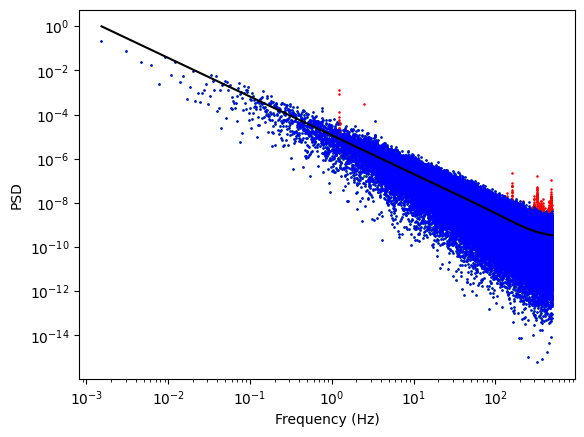

In [17]:
frequencies = data.frequencies
PSD = data.PSD
peak_idx = get_peak_indices(data.peaks)
non_peak_idx = np.setdiff1d(np.arange(len(frequencies)), peak_idx)
plt.scatter(frequencies[peak_idx], PSD[peak_idx], s=.7,c='r')
plt.scatter(frequencies, data.reconstructed_PSD, c='g', s=.7)
plt.scatter(frequencies[non_peak_idx], PSD[non_peak_idx], s=.5,c='b', label='Hydrogel 1 kHz')

plt.plot(frequencies, data.fit_function(frequencies, data.fit_params), c='k')


plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.show()

In [22]:
dt = t_data[1]-t_data[0]
Tau = dt * 1
T_MBR = 1
multiplier = 1
t_MBR = np.linspace(0, T_MBR, int(T_MBR/dt))


mbr =  mean_back_realxation(dt,data.reconstructed_x, Tau, T_MBR, multiplier=multiplier)

  0%|          | 0/195930 [00:00<?, ?it/s]

100%|██████████| 195930/195930 [00:00<00:00, 216175.42it/s]


Text(0, 0.5, 'Mean back relaxation')

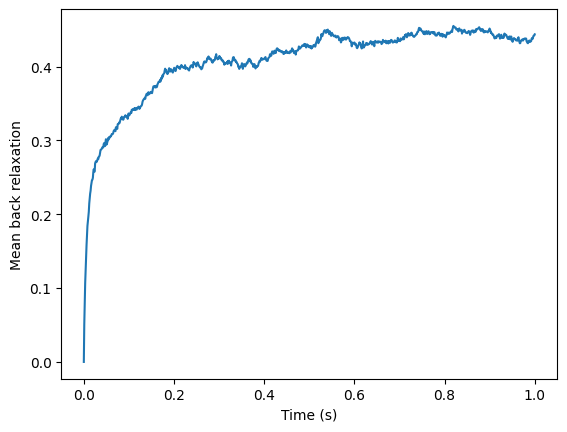

In [23]:
plt.plot(t_MBR, mbr, label='Hydrogel 1 kHz')
plt.xlabel("Time (s)")
plt.ylabel("Mean back relaxation")